# Assignment 6
## Knock airport Weather
Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

Plot:

- The temperature
- The mean temperature each day
- The mean temperature for each month
- 60% of the marks will be given for the above

- For the last 40%

Plot:

- The wind speed (there is data missing from this column)
- The rolling wind speed (say over 24 hours)
- The max wind speed for each day
- The monthly mean of the daily max wind speeds (yer I am being nasty here)
- You do not need to over comment your code. Marks will be given for how nice the plots are.

In [1]:
# importing dependencies

import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings    # importing python warning module
sns.set_theme()            #setting seaborn as default style for plots when using matplotlib

## Loading the dataset

In [2]:
# Read in the data
# Low_memory false was used due to the mixed data type in some columns
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)

## Data Exploration

In [3]:
# Displaying the total number of rows and columns
df.shape

(248394, 21)

In [4]:
df.head(3) #displays the first 3 rows

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [5]:
df.tail(3) #displays the last 3 rows

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
248391,30-nov-2024 22:00,0,0.0,0,10.9,0,10.3,9.7,12.0,92,...,2,15,2,210,,,0.0,,0,8
248392,30-nov-2024 23:00,0,0.0,0,10.8,0,10.3,9.9,12.1,94,...,2,14,2,190,,,0.0,,0,8
248393,01-dec-2024 00:00,0,0.8,0,0.0,0,0.0,0.0,6.1,100,...,2,12,2,190,,,0.0,,0,8


In [6]:
# Check dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248394 entries, 0 to 248393
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    248394 non-null  object 
 1   ind     248394 non-null  int64  
 2   rain    248394 non-null  object 
 3   ind.1   248394 non-null  int64  
 4   temp    248394 non-null  float64
 5   ind.2   248394 non-null  int64  
 6   wetb    248394 non-null  float64
 7   dewpt   248394 non-null  float64
 8   vappr   248394 non-null  float64
 9   rhum    248394 non-null  int64  
 10  msl     248394 non-null  object 
 11  ind.3   248394 non-null  int64  
 12  wdsp    248394 non-null  object 
 13  ind.4   248394 non-null  int64  
 14  wddir   248394 non-null  object 
 15  ww      248394 non-null  object 
 16  w       248394 non-null  object 
 17  sun     248394 non-null  float64
 18  vis     248394 non-null  object 
 19  clht    248394 non-null  object 
 20  clamt   248394 non-null  object 
dtypes: float64

### Column name abbreviations and meaning
- date:  Date and Time (utc)
- rain:  Precipitation Amount (mm)	  
- temp:  Air Temperature (C)	
- wetb:  Wet Bulb Temperature (C)
- dewpt: Dew Point Temperature (C)             
- rhum:  Relative Humidity (%)
- vappr: Vapour Pressure (hPa)	
- msl:   Mean Sea Level Pressure (hPa)
- wdsp:  Mean Wind Speed (knot)
- wddir: Predominant Wind Direction (degree)
- ww:    Synop code for Present Weather
- w:     Synop code for Past Weather
- sun:   Sunshine duration (hours)
- vis:   Visibility (m)
- clht:  Cloud height (100's of ft) - 999 if none 
- clamt: Cloud amount
- ind:   Indicator


# Data Manipulation

#### Missing Values
Pandas isnull was used to check for missing values and no missing values were detected as this does not recognize empty cells as missing values. However the assignment instruction mentioned the presence of missing values in the wind speed column. Checking for unique values in the wind speed column showed that the missing values were not represented as NAN but rather as whitespaces. 

In [7]:
# Check for missing values
df.isnull().sum()

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64

In [8]:
# Check for the uniques values in the wind speed column
df['wdsp'].unique()

array(['0', '6', '8', '9', '7', '11', '13', '12', '14', '10', ' ', '4',
       '5', '3', '2', '15', '16', '17', '18', '19', '1', '20', '23', '21',
       '22', '24', '25', '28', '26', '29', '31', '32', '35', '33', '27',
       '30', '39', '37', '36', '38', '34', '42', '49', '50', '48', '43',
       '40'], dtype=object)

In [9]:
# Rename the dataframe
# Find and replace empty strings with NaN using regular expression
df_clean = df.replace(r'^\s*$', np.nan, regex=True)
df_clean.tail(3)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
248391,30-nov-2024 22:00,0,0.0,0,10.9,0,10.3,9.7,12.0,92,...,2,15,2,210,NaN,NaN,0.0,NaN,0,8
248392,30-nov-2024 23:00,0,0.0,0,10.8,0,10.3,9.9,12.1,94,...,2,14,2,190,NaN,NaN,0.0,NaN,0,8
248393,01-dec-2024 00:00,0,0.8,0,0.0,0,0.0,0.0,6.1,100,...,2,12,2,190,NaN,NaN,0.0,NaN,0,8


In [10]:
# Recheck for missing values
df_clean.isnull().sum()

date         0
ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       55486
w        55487
sun          0
vis      62581
clht        18
clamt       18
dtype: int64

In [11]:
# Replace the missing wind speed values with 0
df_clean['wdsp'] = df_clean['wdsp'].fillna(0)  

In [12]:
# Recheck for NAN in  the wind speed column
df_clean['wdsp'].isnull().sum()

0

In [13]:
df_clean.shape

(248394, 21)

## Timeseries Data Analysis and Visualization

In [14]:
# Set the index to the timeseries
df_clean.set_index('date', inplace=True)
df_clean.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


### Temperature Plots
- The temperature
- The mean temperature each day
- The mean temperature for each month

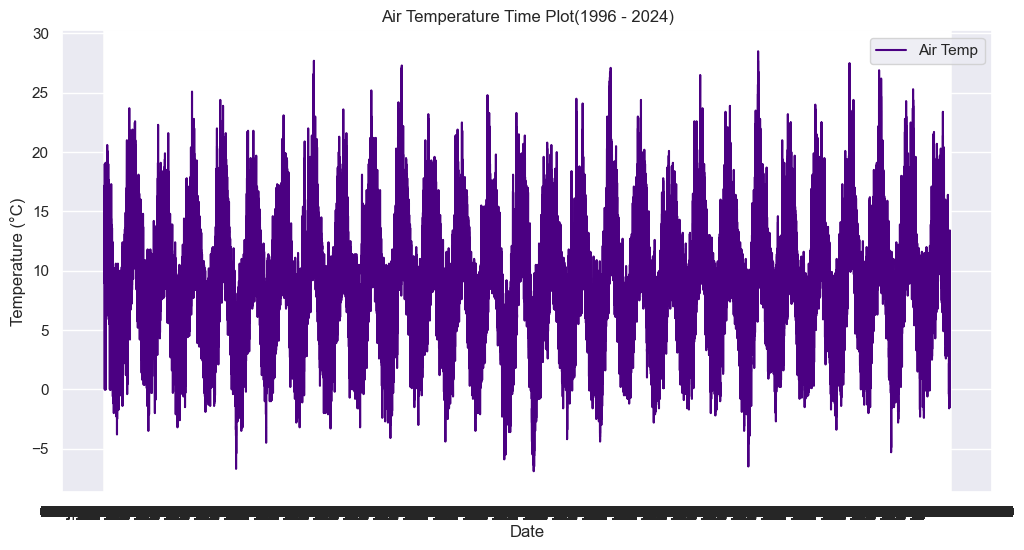

In [15]:
# Plot the Air temperature in Celsius
plt.figure(figsize=(12, 6))
plt.plot(df_clean['temp'], label='Air Temp', color='indigo')
plt.title('Air Temperature Time Plot(1996 - 2024)') 
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [16]:
# Use pandas timeseries resampling to get the daily mean temperature
daily_mean_temp = df_clean['temp'].resample('D').mean()
daily_mean_temp 

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

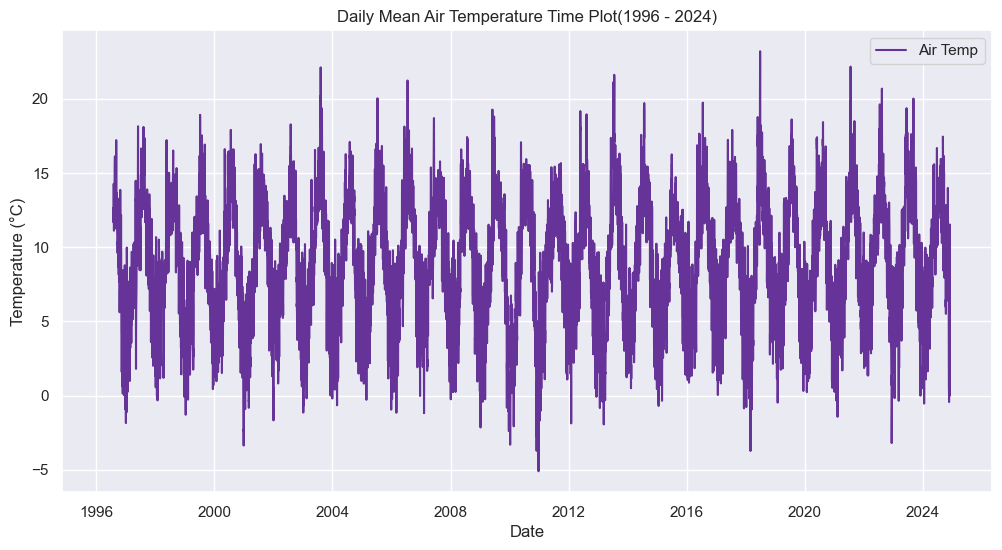

In [274]:
# Plot the daily mean temperature
plt.figure(figsize=(12, 6))
plt.plot(daily_mean_temp, label='Air Temp', color='rebeccapurple')
plt.title('Daily Mean Air Temperature Time Plot(1996 - 2024)') 
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [275]:
# Use pandas timeseries resampling to get the monthly mean temperature
monthly_mean_temp = df_clean['temp'].resample('M').mean()
monthly_mean_temp 

date
1996-04-30    11.500000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31    12.650000
1996-08-31    12.946909
                ...    
2024-08-31    13.233333
2024-09-30    11.741389
2024-10-31     9.966263
2024-11-30     7.449722
2024-12-31     0.000000
Freq: M, Name: temp, Length: 345, dtype: float64

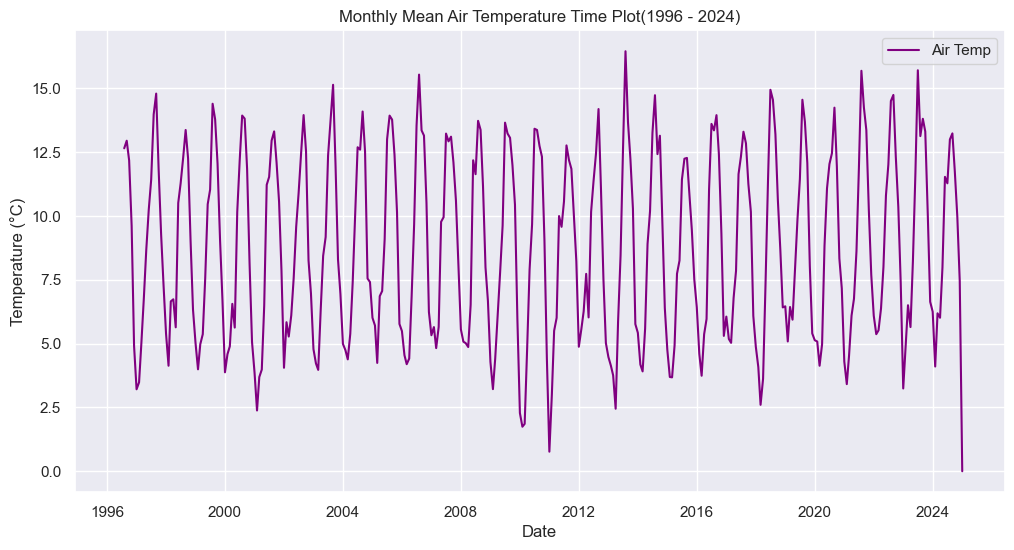

In [276]:
# Plot the monthly mean temperature
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_temp, label='Air Temp', color='purple')
plt.title('Monthly Mean Air Temperature Time Plot(1996 - 2024)') 
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


### Wind speed plot over time 
- The wind speed
- The rolling wind speed over 24 hours
- The max wind speed for each day
- The monthly mean of the daily max wind speeds 

In [277]:
# Convert the wind speed column to type float as plotting it as type object returned a typeerror
# Tip from lecture lab 7
df_clean['wdsp'] = (df_clean['wdsp'].astype(float))
print(df_clean['wdsp'].dtypes)


float64


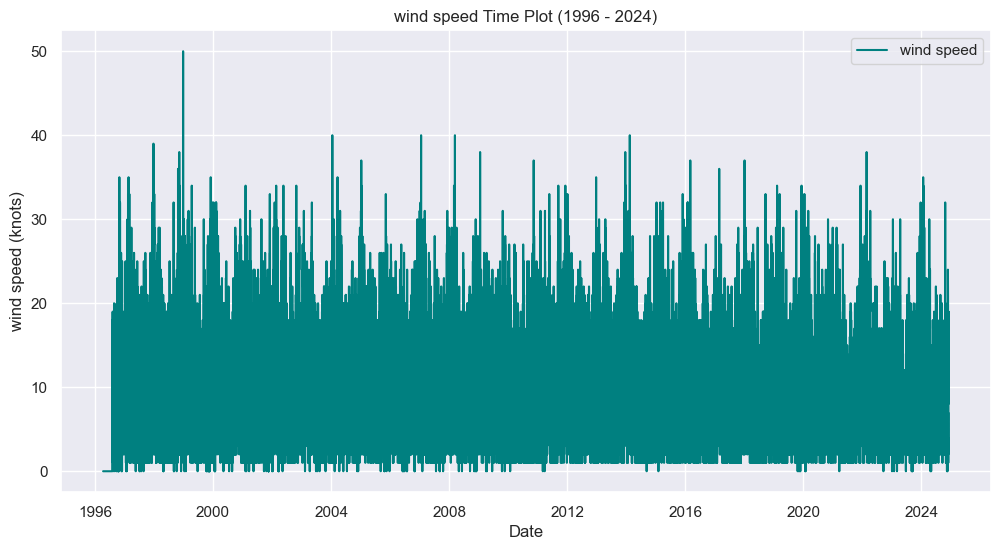

In [278]:
# Plot the Mean Wind Speed (knot)
plt.figure(figsize=(12, 6))
plt.plot(df_clean['wdsp'], label='wind speed', color='teal')
plt.title('wind speed Time Plot (1996 - 2024)') 
plt.xlabel('Date')
plt.ylabel('wind speed (knots)')
plt.legend()
plt.show()


In [279]:
# Calculate the 24-hour rolling average wind speed
rolling_wdsp = df_clean['wdsp'].rolling('24H').mean()
rolling_wdsp.head

<bound method NDFrame.head of date
1996-04-10 14:00:00     0.000000
1996-07-31 08:00:00     0.000000
1996-07-31 09:00:00     0.000000
1996-07-31 10:00:00     0.000000
1996-07-31 11:00:00     0.000000
                         ...    
2024-11-30 20:00:00    13.333333
2024-11-30 21:00:00    13.583333
2024-11-30 22:00:00    13.750000
2024-11-30 23:00:00    13.833333
2024-12-01 00:00:00    13.791667
Name: wdsp, Length: 248394, dtype: float64>

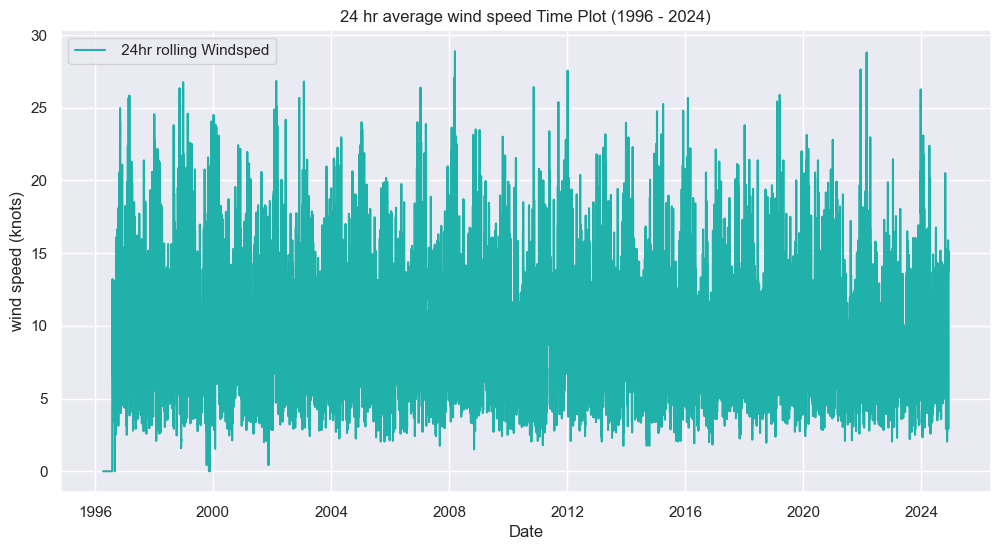

In [280]:
# Plot the 24 hour rolling average wind speed

plt.figure(figsize=(12, 6))
plt.plot(rolling_wdsp, label=' 24hr rolling Windsped', color='lightseagreen')
plt.title('24 hr average wind speed Time Plot (1996 - 2024)') 
plt.xlabel('Date')
plt.ylabel('wind speed (knots)')
plt.legend()
plt.show()


In [281]:
# Calculate the maximum daily wind speed
daily_max_wdsp = df_clean['wdsp'].resample('D').max()
daily_max_wdsp 

date
1996-04-10     0.0
1996-04-11     NaN
1996-04-12     NaN
1996-04-13     NaN
1996-04-14     NaN
              ... 
2024-11-27     6.0
2024-11-28    19.0
2024-11-29    17.0
2024-11-30    19.0
2024-12-01    12.0
Freq: D, Name: wdsp, Length: 10463, dtype: float64

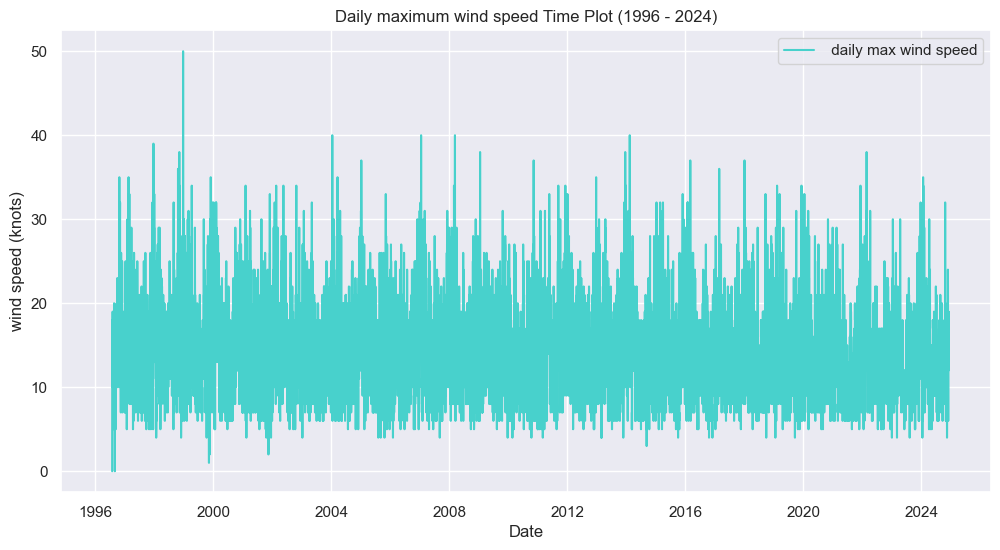

In [282]:
# Plot the maximum wind speed for each day

plt.figure(figsize=(12, 6))
plt.plot(daily_max_wdsp, label=' daily max wind speed', color='mediumturquoise')
plt.title('Daily maximum wind speed Time Plot (1996 - 2024)') 
plt.xlabel('Date')
plt.ylabel('wind speed (knots)')
plt.legend()
plt.show()

In [283]:
# Calculate the monthly mean of the daily maximum wind speed
monthly_max_wdsp = daily_max_wdsp.resample('m').mean()
monthly_max_wdsp

date
1996-04-30     0.000000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31     0.000000
1996-08-31    12.516129
                ...    
2024-08-31    14.451613
2024-09-30    12.266667
2024-10-31    13.064516
2024-11-30    11.733333
2024-12-31    12.000000
Freq: M, Name: wdsp, Length: 345, dtype: float64

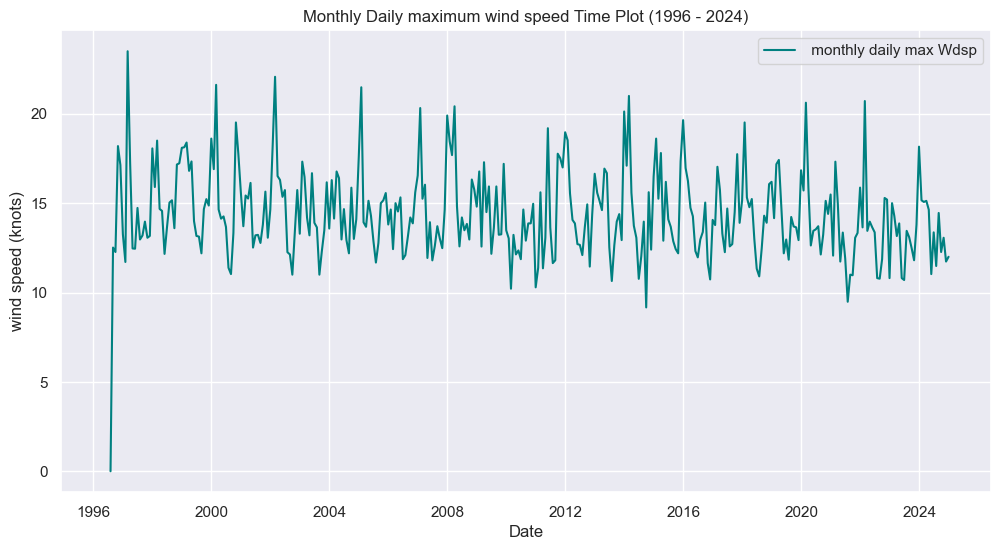

In [284]:
# Plot the monthly mean of the daily maximum wind speed

plt.figure(figsize=(12, 6))
plt.plot(monthly_max_wdsp, label=' monthly daily max Wdsp', color='teal')
plt.title('Monthly Daily maximum wind speed Time Plot (1996 - 2024)') 
plt.xlabel('Date')
plt.ylabel('wind speed (knots)')
plt.legend()
plt.show()

## References

- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
- https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
- https://pandas.pydata.org/pandas-docs/version/1.3/user_guide/timeseries.html
- https://www.statology.org/seaborn-time-series/
- https://machinelearningmastery.com/resample-interpolate-time-series-data-python/
- https://www.datacamp.com/tutorial/pandas-resample-asfreq
- https://matplotlib.org/stable/gallery/color/named_colors.html
- https://medium.com/top-python-libraries/11-key-points-for-time-series-analysis-using-pandas-c01ec83fb12c
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
